In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 300)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
from jj_dummification import *

In [3]:
housing = HousingCategorical()
housing.list_checker()
housing.one_hot_encode()
housing.label_encode()

In [17]:
categories = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','LotConfig',
             'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
             'Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
             'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical',
             'KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
             'PoolQC','Fence','MiscFeature','SaleType','SaleCondition','MoSold']

continuous = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF',
             '2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
             'ScreenPorch','PoolArea','MiscVal','YearBuilt','YearRemodAdd','GarageYrBlt']

# years = ['YearBuilt','YearRemodAdd','GarageYrBlt']


In [19]:
len(continuous)

21

In [20]:
housing.sample(2)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CemntBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_Bsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_Bsmt,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_G,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,MiscFeature_No_MF,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [12]:

include_new_bi = ['2ndFlrSF','LowQualSF'] 

do not need to add binary feature for BsmtFinSF1 or 2 or unfSF because there is already categorical variable on BsmtFinType. Same logic applies for GarageArea and GarageType. Same with PoolQC and PoolArea.

BsmtHalfBath and BsmtFullBath are both continuous variables but very skewed towards zero. No transformation to be done here though.

perhaps high multicollinearity between garagecars capacity and garagearea

# porches
given the nature of porch types, there is alot of zeroes among the porch features

for pool: either create a binary variable to account for zeros or simply change all non_zeros to 1 which effectively makes it a binary variable, not sure having the minor linearly relationship of the continuous portion is worth adding an extra feature

for miscfeatures, maybe drop via lasso, maybe make it binary and combine with miscvalue or simply leave as is?

In [7]:
housing = housing.df

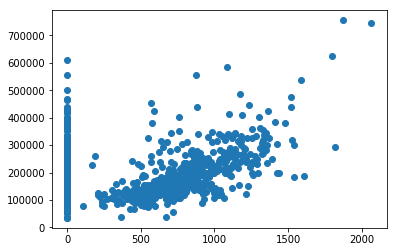

In [8]:
plt.scatter(housing['2ndFlrSF'],housing['SalePrice'])

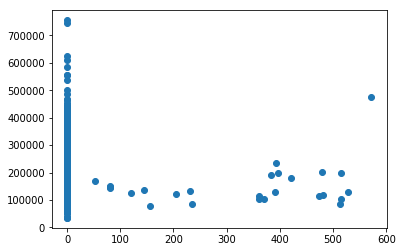

In [9]:
plt.scatter(housing['LowQualFinSF'],housing['SalePrice'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import KFold, train_test_split

In [53]:
random_states = [21,24,46,59,66,12,7]
score_log = []
target = housing.iloc[:,-1]
predictors = housing.iloc[:,:-1]

for random_state in random_states:

    min_max = MinMaxScaler()
    robust = RobustScaler()
    standard = StandardScaler()

    scalers = [min_max,robust,standard]

    lr = LinearRegression(n_jobs=-1)
    lasso = Lasso(random_state=random_state, max_iter=5000)
    ridge = Ridge(random_state=random_state)

    regressors = [lr,lasso,ridge]

    for scaler in scalers:
        scaled_x = scaler.fit_transform(predictors)
        X_train, X_test, y_train, y_test = train_test_split(scaled_x, target, random_state=random_state, test_size=0.25)
        for regressor in regressors:
            single_test_log = []
            regressor.fit(X_train,y_train)
            single_test_log.append(random_state)
            single_test_log.append(type(scaler).__name__)
            single_test_log.append(type(regressor).__name__)
            single_test_log.append(regressor.score(X_train, y_train)*100)
            single_test_log.append(regressor.score(X_test,y_test)*100)
            score_log.append(single_test_log)
            print('training score: {}'.format(regressor.score(X_train,y_train)*100))
            print('testing score: {}'.format(regressor.score(X_test,y_test)*100))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

training score: 93.38243772832557
testing score: -4.349523490453698e+23


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=21,
      selection='cyclic', tol=0.0001, warm_start=False)

training score: 93.49307082666803
testing score: 58.49643587465974


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=21, solver='auto', tol=0.001)

training score: 90.35192775300766
testing score: 84.03700625422987


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

training score: 93.50145144253264
testing score: 54.60192213452137


C:\Users\Jimmy Jing\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164877853364.13638, tolerance: 688937348.8526999
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=21,
      selection='cyclic', tol=0.0001, warm_start=False)

training score: 93.49482491027551
testing score: 58.38588452978159


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=21, solver='auto', tol=0.001)

training score: 90.57012181497139
testing score: 83.31274235090382


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

training score: 93.50148402011209
testing score: -2.0655051555526315e+23


C:\Users\Jimmy Jing\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13655699743.064148, tolerance: 688937348.8526999
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=21,
      selection='cyclic', tol=0.0001, warm_start=False)

training score: 93.50107550747379
testing score: 57.47441923297092


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=21, solver='auto', tol=0.001)

training score: 93.47416229446411
testing score: 47.42042132459209


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

training score: 93.59612015569869
testing score: -1.8994937201288986e+24


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=24,
      selection='cyclic', tol=0.0001, warm_start=False)

training score: 93.69816644529439
testing score: 49.760566006040975


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=24, solver='auto', tol=0.001)

training score: 90.84668211381664
testing score: 82.51564919608066


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

training score: 93.70580934048786
testing score: 47.020781161396634


C:\Users\Jimmy Jing\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170643456072.8785, tolerance: 638221610.6079863
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=24,
      selection='cyclic', tol=0.0001, warm_start=False)

training score: 93.70057929651836
testing score: 49.48751228725716


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=24, solver='auto', tol=0.001)

training score: 91.2196511273162
testing score: 79.72954775420557


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

training score: 93.70516527315239
testing score: -2.364519527742812e+24


C:\Users\Jimmy Jing\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2362631916.843628, tolerance: 638221610.6079863
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=24,
      selection='cyclic', tol=0.0001, warm_start=False)

training score: 93.70559061212175
testing score: 47.16722936918346


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=24, solver='auto', tol=0.001)

training score: 93.67681736151935
testing score: 54.43819665944647


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

training score: 92.80919044813285
testing score: -3.511530780159608e+17


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=46,
      selection='cyclic', tol=0.0001, warm_start=False)

training score: 92.80260523478691
testing score: 65.07080545387129


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=46, solver='auto', tol=0.001)

training score: 90.21083100413847
testing score: 86.09117328758917


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

training score: 92.80912754483266
testing score: 63.056904722828875


C:\Users\Jimmy Jing\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 204440523144.49072, tolerance: 698851269.2997109
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=46,
      selection='cyclic', tol=0.0001, warm_start=False)

training score: 92.80326338556176
testing score: 64.92002108865663


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=46, solver='auto', tol=0.001)

training score: 90.41425282508327
testing score: 85.4710748559173


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

training score: 92.80905242733627
testing score: -1.1608681850890134e+22


C:\Users\Jimmy Jing\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1079312532.8483276, tolerance: 698851269.2997109
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=46,
      selection='cyclic', tol=0.0001, warm_start=False)

training score: 92.80867820957779
testing score: 63.38363890999867


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=46, solver='auto', tol=0.001)

training score: 92.79036186364858
testing score: 66.93815397022449


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

training score: 93.10608471175078
testing score: -4.8572761818934726e+20


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=59,
      selection='cyclic', tol=0.0001, warm_start=False)

training score: 93.09905321587885
testing score: 82.9747700353941


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=59, solver='auto', tol=0.001)

training score: 89.82628996959657
testing score: 86.17991460685717


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

training score: 93.10606882314435
testing score: 82.65345594027542


C:\Users\Jimmy Jing\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199719766571.27356, tolerance: 699532514.3304342
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=59,
      selection='cyclic', tol=0.0001, warm_start=False)

training score: 93.10003677459133
testing score: 82.924493655181


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=59, solver='auto', tol=0.001)

training score: 90.01849133946492
testing score: 85.45932096965161


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

training score: 93.10591223763967
testing score: -8.564240401907506e+23


C:\Users\Jimmy Jing\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1148655674.2182007, tolerance: 699532514.3304342
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=59,
      selection='cyclic', tol=0.0001, warm_start=False)

training score: 93.10595164938596
testing score: 82.7116333197916


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=59, solver='auto', tol=0.001)

training score: 93.0788839741006
testing score: 83.21165397284305


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

training score: 92.72555698855396
testing score: -4.542141090782344e+23


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=66,
      selection='cyclic', tol=0.0001, warm_start=False)

training score: 92.71992665171574
testing score: 59.805104111184036


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=66, solver='auto', tol=0.001)

training score: 90.1914761100667
testing score: 84.99381693256322


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

training score: 92.72562789946862
testing score: 57.54889042684934


C:\Users\Jimmy Jing\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196161911718.17627, tolerance: 721408818.9985669
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=66,
      selection='cyclic', tol=0.0001, warm_start=False)

training score: 92.72086107341173
testing score: 59.63890343611623


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=66, solver='auto', tol=0.001)

training score: 90.3125934937098
testing score: 85.13330430708567


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

training score: 92.71424892172074
testing score: -3.1416934170303996e+24


C:\Users\Jimmy Jing\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1500795581.720581, tolerance: 721408818.9985669
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=66,
      selection='cyclic', tol=0.0001, warm_start=False)

training score: 92.72547273435625
testing score: 57.802687860489755


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=66, solver='auto', tol=0.001)

training score: 92.70492590508216
testing score: 62.83833210034968


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

training score: 93.18957519515625
testing score: -6.5869504476967e+22


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=12,
      selection='cyclic', tol=0.0001, warm_start=False)

training score: 93.21860780060256
testing score: 61.291881992252165


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=12, solver='auto', tol=0.001)

training score: 92.58929828649701
testing score: 70.0630355357756


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

training score: 93.22574187216426
testing score: 60.55314829317046


C:\Users\Jimmy Jing\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168182484034.49258, tolerance: 673426805.4098603
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=12,
      selection='cyclic', tol=0.0001, warm_start=False)

training score: 93.21894813502807
testing score: 61.14872594532093


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=12, solver='auto', tol=0.001)

training score: 92.98808825676772
testing score: 62.28708799239786


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

training score: 93.2255482737843
testing score: -3.560908618881963e+25


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=12,
      selection='cyclic', tol=0.0001, warm_start=False)

training score: 93.2254203048175
testing score: 61.773835703918834


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=12, solver='auto', tol=0.001)

training score: 93.22162212733637
testing score: 61.716239936192686


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

training score: 93.49127711211071
testing score: -5.446158146875886e+19


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=7,
      selection='cyclic', tol=0.0001, warm_start=False)

training score: 93.52448791016684
testing score: 61.447535718105414


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=7, solver='auto', tol=0.001)

training score: 90.33415780185466
testing score: 82.73676999757193


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

training score: 93.5306142530947
testing score: 59.587669628962225


C:\Users\Jimmy Jing\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172935976171.9544, tolerance: 663878172.4038193
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=7,
      selection='cyclic', tol=0.0001, warm_start=False)

training score: 93.52595560332311
testing score: 60.92212279827203


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=7, solver='auto', tol=0.001)

training score: 90.48473939241168
testing score: 83.44442072529266


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

training score: 93.53039733815756
testing score: -3.715363749362314e+23


C:\Users\Jimmy Jing\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 821844106.5264893, tolerance: 663878172.4038193
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=7,
      selection='cyclic', tol=0.0001, warm_start=False)

training score: 93.5305100044196
testing score: 59.54099697502596


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=7, solver='auto', tol=0.001)

training score: 93.50729125824829
testing score: 63.092449801674256


In [57]:
pd.DataFrame(score_log, columns=['RandomState','Scaler','Regressor','TrainScore','TestScore'])

,RandomState,Scaler,Regressor,TrainScore,TestScore
0,21,MinMaxScaler,LinearRegression,93.382,-434952349045369790791680.000
1,21,MinMaxScaler,Lasso,93.493,58.496
2,21,MinMaxScaler,Ridge,90.352,84.037
3,21,RobustScaler,LinearRegression,93.501,54.602
4,21,RobustScaler,Lasso,93.495,58.386
5,21,RobustScaler,Ridge,90.570,83.313
6,21,StandardScaler,LinearRegression,93.501,-206550515555263154487296.000
7,21,StandardScaler,Lasso,93.501,57.474
8,21,StandardScaler,Ridge,93.474,47.420
9,24,MinMaxScaler,LinearRegression,93.596,-1899493720128898566455296.000



Three types of scalers: MinMax, Robust, Standard
4-k fold cross-validation
3 types of algos: LR, Lasso, Ridge
scale continuous only or also binary variables

In [58]:
random_states = [21,24,46,59,66,12,7]
score_log2 = []
target = housing.iloc[:,-1]
predictors = housing.iloc[:,:-1]

for random_state in random_states:

    min_max = MinMaxScaler()
    robust = RobustScaler()
    standard = StandardScaler()

    scalers = [min_max,robust,standard]

    lr = LinearRegression(n_jobs=-1)
    lasso = Lasso(random_state=random_state, max_iter=5000)
    ridge = Ridge(random_state=random_state)

    regressors = [lr,lasso,ridge]

    for scaler in scalers:
        predictors[continuous] = scaler.fit_transform(predictors[continuous])
        
        X_train, X_test, y_train, y_test = train_test_split(predictors, target, random_state=random_state, test_size=0.25)
        for regressor in regressors:
            single_test_log = []
            regressor.fit(X_train,y_train)
            single_test_log.append(random_state)
            single_test_log.append(type(scaler).__name__)
            single_test_log.append(type(regressor).__name__)
            single_test_log.append(regressor.score(X_train, y_train)*100)
            single_test_log.append(regressor.score(X_test,y_test)*100)
            score_log2.append(single_test_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=21,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=21, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=21,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=21, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=21,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=21, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=24,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=24, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=24,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=24, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=24,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=24, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=46,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=46, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=46,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=46, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=46,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=46, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=59,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=59, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=59,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=59, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

C:\Users\Jimmy Jing\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1673175823.5740356, tolerance: 699532514.3304342
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=59,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=59, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=66,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=66, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=66,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=66, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

C:\Users\Jimmy Jing\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 938252075.5292358, tolerance: 721408818.9985669
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=66,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=66, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=12,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=12, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=12,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=12, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=12,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=12, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=7,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=7, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=7,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=7, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

C:\Users\Jimmy Jing\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1235158449.6780396, tolerance: 663878172.4038193
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=7,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=7, solver='auto', tol=0.001)

In [59]:
random_states = [21,24,46,59,66,12,7]
score_log3 = []
target = housing.iloc[:,-1]
predictors = housing.iloc[:,:-1]

for random_state in random_states:

    min_max = MinMaxScaler()
    robust = RobustScaler()
    standard = StandardScaler()

    scalers = [min_max,robust,standard]

    lr = LinearRegression(n_jobs=-1)
    lasso = Lasso(random_state=random_state, max_iter=5000)
    ridge = Ridge(random_state=random_state)

    regressors = [lr,lasso,ridge]

    for scaler in scalers:
#         predictors[continuous] = scaler.fit_transform(predictors[continuous])
        
        X_train, X_test, y_train, y_test = train_test_split(predictors, target, random_state=random_state, test_size=0.25)
        for regressor in regressors:
            single_test_log = []
            regressor.fit(X_train,y_train)
            single_test_log.append(random_state)
            single_test_log.append(type(scaler).__name__)
            single_test_log.append(type(regressor).__name__)
            single_test_log.append(regressor.score(X_train, y_train)*100)
            single_test_log.append(regressor.score(X_test,y_test)*100)
            score_log3.append(single_test_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

C:\Users\Jimmy Jing\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151052167886.0567, tolerance: 688937348.8526999
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=21,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=21, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

C:\Users\Jimmy Jing\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151052167886.0567, tolerance: 688937348.8526999
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=21,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=21, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

C:\Users\Jimmy Jing\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151052167886.0567, tolerance: 688937348.8526999
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=21,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=21, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

C:\Users\Jimmy Jing\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170497602357.69757, tolerance: 638221610.6079863
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=24,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=24, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

C:\Users\Jimmy Jing\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170497602357.69757, tolerance: 638221610.6079863
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=24,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=24, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

C:\Users\Jimmy Jing\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170497602357.69757, tolerance: 638221610.6079863
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=24,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=24, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

C:\Users\Jimmy Jing\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165888317898.8628, tolerance: 698851269.2997109
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=46,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=46, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

C:\Users\Jimmy Jing\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165888317898.8628, tolerance: 698851269.2997109
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=46,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=46, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

C:\Users\Jimmy Jing\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165888317898.8628, tolerance: 698851269.2997109
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=46,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=46, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=59,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=59, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=59,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=59, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=59,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=59, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=66,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=66, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=66,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=66, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=66,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=66, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=12,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=12, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=12,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=12, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=12,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=12, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=7,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=7, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=7,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=7, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=7,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=7, solver='auto', tol=0.001)

In [60]:
score_df = pd.DataFrame(score_log, columns=['RandomState','Scaler','Regressor','TrainScore','TestScore'])
score_df2 = pd.DataFrame(score_log2, columns=['RandomState','Scaler','Regressor','TrainScore','TestScore'])
score_df3 = pd.DataFrame(score_log3, columns=['RandomState','Scaler','Regressor','TrainScore','TestScore'])

In [61]:
score_df['Scaled'] = 'All'
score_df2['Scaled'] = 'Continuous'
score_df3['Scaled'] = 'None'

In [62]:
final_score_df = pd.concat([score_df,score_df2,score_df3], axis=0)

In [63]:
final_score_df

,RandomState,Scaler,Regressor,TrainScore,TestScore,Scaled
0,21,MinMaxScaler,LinearRegression,93.382,-434952349045369790791680.000,All
1,21,MinMaxScaler,Lasso,93.493,58.496,All
2,21,MinMaxScaler,Ridge,90.352,84.037,All
3,21,RobustScaler,LinearRegression,93.501,54.602,All
4,21,RobustScaler,Lasso,93.495,58.386,All
5,21,RobustScaler,Ridge,90.570,83.313,All
6,21,StandardScaler,LinearRegression,93.501,-206550515555263154487296.000,All
7,21,StandardScaler,Lasso,93.501,57.474,All
8,21,StandardScaler,Ridge,93.474,47.420,All
9,24,MinMaxScaler,LinearRegression,93.596,-1899493720128898566455296.000,All


In [65]:
no_lr_df = final_score_df[final_score_df.Regressor != 'LinearRegression']

In [68]:
no_lr_df.groupby(['Scaled','Scaler']).mean()['TestScore']

Scaled      Scaler        
All         MinMaxScaler     72.533
            RobustScaler     71.590
            StandardScaler   62.108
Continuous  MinMaxScaler     72.295
            RobustScaler     71.801
            StandardScaler   71.580
None        MinMaxScaler     71.557
            RobustScaler     71.557
            StandardScaler   71.557
Name: TestScore, dtype: float64

all the scalers performed about the same. didnt really seem to matter how much we scaled either

In [69]:
no_lr_df.groupby(['Regressor']).mean()['TestScore']

Regressor
Lasso   62.414
Ridge   79.048
Name: TestScore, dtype: float64

In [74]:
no_lr_df.groupby(['Regressor','Scaler']).mean()['TestScore']

Regressor  Scaler        
Lasso      MinMaxScaler     62.614
           RobustScaler     62.507
           StandardScaler   62.122
Ridge      MinMaxScaler     81.643
           RobustScaler     80.792
           StandardScaler   74.708
Name: TestScore, dtype: float64

In [104]:
def basic_score_log():
    random_states = [21,24,46,59,66,12,7]
    score_log = []    
    
    continuous = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF',
                 '2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                  '3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearBuilt','YearRemodAdd','GarageYrBlt']
    
    for random_state in random_states:

        min_max = MinMaxScaler()
        robust = RobustScaler()
        standard = StandardScaler()

        scalers = [min_max,robust,standard]
        scaling = ['All','Continous','None']
        
        lr = LinearRegression()
        lasso = Lasso(random_state=random_state, max_iter=5000)
        ridge = Ridge(random_state=random_state)

        regressors = [lr,lasso,ridge]
        for scaled_type in scaling:

            for scaler in scalers:
                target = housing.iloc[:,-1]
                predictors = housing.iloc[:,:-1]
                if scaled_type == 'All':
                    predictors = scaler.fit_transform(predictors)
                elif scaled_type == 'Continous':
                    predictors[continuous] = scaler.fit_transform(predictors[continuous])
                elif scaled_type == 'None':
                    pass                

                X_train, X_test, y_train, y_test = train_test_split(predictors, target, random_state=random_state, test_size=0.25)
                for regressor in regressors:
                    single_test_log = []
                    regressor.fit(X_train,y_train)
                    single_test_log.append(random_state)
                    single_test_log.append(type(scaler).__name__)
                    single_test_log.append(type(regressor).__name__)
                    single_test_log.append(regressor.score(X_train, y_train)*100)
                    single_test_log.append(regressor.score(X_test,y_test)*100)
                    single_test_log.append(scaled_type)
                    score_log.append(single_test_log)
            
    score_df = pd.DataFrame(score_log, columns=['RandomState','Scaler','Regressor','TrainScore','TestScore','Scaling'])
    return score_df

In [89]:
scores = basic_score_log()

C:\Users\Jimmy Jing\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164877853364.13638, tolerance: 688937348.8526999
  positive)
C:\Users\Jimmy Jing\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13655699743.064148, tolerance: 688937348.8526999
  positive)
C:\Users\Jimmy Jing\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164863968329.20084, tolerance: 688937348.8526999
  positive)
C:\Users\Jimmy Jing\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

C:\Users\Jimmy Jing\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1235158449.680481, tolerance: 663878172.4038193
  positive)


In [91]:
scores =  scores[scores.Regressor != 'LinearRegression']

In [92]:
scores.columns

Index(['RandomState', 'Scaler', 'Regressor', 'TrainScore', 'TestScore', 'Scaling'], dtype='object')

In [93]:
scores.groupby(['Scaling','Scaler']).mean()['TestScore']

Scaling    Scaler        
All        MinMaxScaler     72.533
           RobustScaler     71.590
           StandardScaler   62.108
Continous  MinMaxScaler     72.295
           RobustScaler     71.591
           StandardScaler   71.580
None       MinMaxScaler     71.557
           RobustScaler     71.557
           StandardScaler   71.557
Name: TestScore, dtype: float64

In [94]:
scores.groupby(['Regressor','Scaler']).mean()['TestScore']

Regressor  Scaler        
Lasso      MinMaxScaler     62.614
           RobustScaler     62.483
           StandardScaler   62.122
Ridge      MinMaxScaler     81.643
           RobustScaler     80.675
           StandardScaler   74.708
Name: TestScore, dtype: float64

seems like minmax scaler and ridge is outperforming the rest and best scaling is done for continously

# Log(y)

In [99]:
def basic_score_log2():
    random_states = [21,24,46,59,66,12,7]
    score_log = []    
    
    continuous = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF',
                 '2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                  '3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearBuilt','YearRemodAdd','GarageYrBlt']
    
    for random_state in random_states:

        min_max = MinMaxScaler()
        robust = RobustScaler()
        standard = StandardScaler()

        scalers = [min_max,robust,standard]
        scaling = ['All','Continous','None']
        
        lr = LinearRegression()
        lasso = Lasso(random_state=random_state, max_iter=5000)
        ridge = Ridge(random_state=random_state)

        regressors = [lr,lasso,ridge]
        for scaled_type in scaling:

            for scaler in scalers:
                target = np.log(housing.iloc[:,-1])
                predictors = housing.iloc[:,:-1]
                if scaled_type == 'All':
                    predictors = scaler.fit_transform(predictors)
                elif scaled_type == 'Continous':
                    predictors[continuous] = scaler.fit_transform(predictors[continuous])
                elif scaled_type == 'None':
                    pass                

                X_train, X_test, y_train, y_test = train_test_split(predictors, target, random_state=random_state, test_size=0.25)
                for regressor in regressors:
                    single_test_log = []
                    regressor.fit(X_train,y_train)
                    single_test_log.append(random_state)
                    single_test_log.append(type(scaler).__name__)
                    single_test_log.append(type(regressor).__name__)
                    single_test_log.append(regressor.score(X_train, y_train)*100)
                    single_test_log.append(regressor.score(X_test,y_test)*100)
                    single_test_log.append(scaled_type)
                    score_log.append(single_test_log)
            
    score_df = pd.DataFrame(score_log, columns=['RandomState','Scaler','Regressor','TrainScore','TestScore','Scaling'])
    return score_df

In [102]:
log_score = basic_score_log2()

In [107]:
log_score

,RandomState,Scaler,Regressor,TrainScore,TestScore,Scaling
0,21,MinMaxScaler,LinearRegression,95.097,-41051567161575466860544.000,All
1,21,MinMaxScaler,Lasso,0.000,-0.475,All
2,21,MinMaxScaler,Ridge,93.120,88.815,All
3,21,RobustScaler,LinearRegression,95.109,70.044,All
4,21,RobustScaler,Lasso,3.748,1.988,All
5,21,RobustScaler,Ridge,93.280,88.432,All
6,21,StandardScaler,LinearRegression,95.109,-1872540519723927351590912.000,All
7,21,StandardScaler,Lasso,0.000,-0.475,All
8,21,StandardScaler,Ridge,95.088,67.324,All
9,21,MinMaxScaler,LinearRegression,93.970,-243728896842754439512064.000,Continous


In [110]:
log_score =  log_score[log_score.Regressor != 'LinearRegression']

log_score.groupby(['Scaling','Scaler']).mean()['TestScore']

Scaling    Scaler        
All        MinMaxScaler     43.667
           RobustScaler     44.477
           StandardScaler   36.979
Continous  MinMaxScaler     43.614
           RobustScaler     44.479
           StandardScaler   43.196
None       MinMaxScaler     81.465
           RobustScaler     81.465
           StandardScaler   81.465
Name: TestScore, dtype: float64

In [112]:
log_score.groupby(['Regressor','Scaling']).mean()['TestScore']

Regressor  Scaling  
Lasso      All          0.576
           Continous    0.576
           None        76.285
Ridge      All         82.840
           Continous   86.950
           None        86.644
Name: TestScore, dtype: float64

seems like ridge is still best and we should use continous scaling. maybe either robust or minmax scaling